In [2]:

import numpy as np
import jax.numpy as jnp

from scoobpsf.imshows import *
import scoobpsf.jax_scoob as jscoob
import scoobpsf.jax_dm as jdm

from importlib import reload

In [2]:
!nvidia-smi

Thu Sep 14 16:43:31 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100 80GB PCIe           On | 00000000:25:00.0 Off |                    0 |
| N/A   33C    P0               64W / 300W|    423MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [38]:
reload(jdm)
DM = jdm.DeformableMirror()

In [7]:
DM.get_surface()

101 25.25
860


In [5]:
np.asarray(DM.inf_fun)

array([[3.45624189e-07, 4.64023278e-07, 6.19285409e-07, ...,
        6.19285409e-07, 4.64023278e-07, 3.45624189e-07],
       [4.64023278e-07, 6.22981867e-07, 8.31431522e-07, ...,
        8.31431522e-07, 6.22981867e-07, 4.64023278e-07],
       [6.19285409e-07, 8.31431522e-07, 1.10962841e-06, ...,
        1.10962841e-06, 8.31431522e-07, 6.19285409e-07],
       ...,
       [6.19285409e-07, 8.31431522e-07, 1.10962841e-06, ...,
        1.10962841e-06, 8.31431522e-07, 6.19285409e-07],
       [4.64023278e-07, 6.22981867e-07, 8.31431522e-07, ...,
        8.31431522e-07, 6.22981867e-07, 4.64023278e-07],
       [3.45624189e-07, 4.64023278e-07, 6.19285409e-07, ...,
        6.19285409e-07, 4.64023278e-07, 3.45624189e-07]])

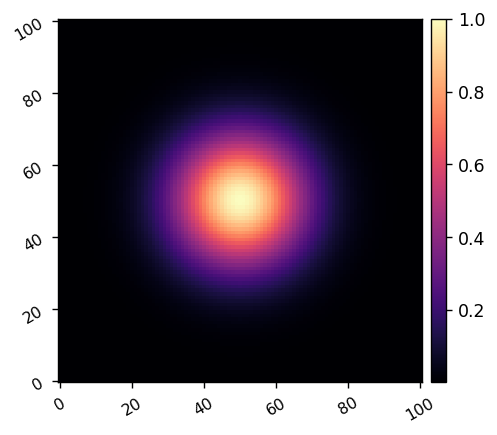

In [39]:
imshow1(np.asarray(DM.inf_fun))

In [21]:
Nsurf = int(DM.inf_sampling * DM.Nact)
Nsurf

858

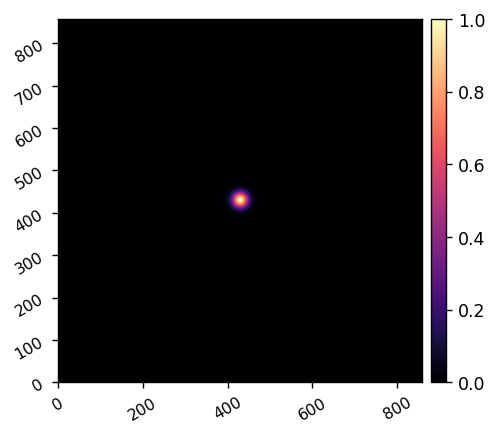

In [86]:
padded_inf_fun = jdm.pad_or_crop(DM.inf_fun, Nsurf)
imshow1(np.asarray(padded_inf_fun))

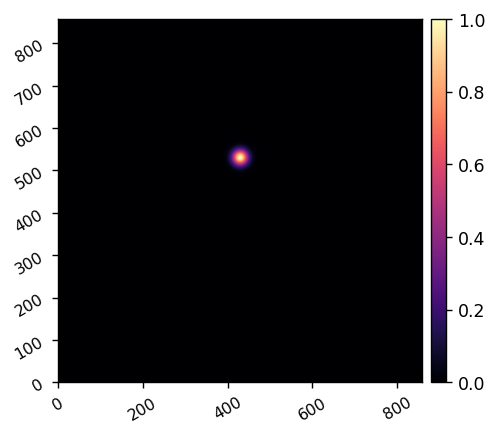

(858, 858)

In [91]:
reload(jdm)
# new_inf_fun = jnp.pad(padded_inf_fun,((100,0),(0,100)), mode='constant')[:-100, :-100]
new_inf_fun = jdm.shift(padded_inf_fun, 100, 100)
imshow1(np.asarray(new_inf_fun))
new_inf_fun.shape

In [47]:
DM.Nacts

952

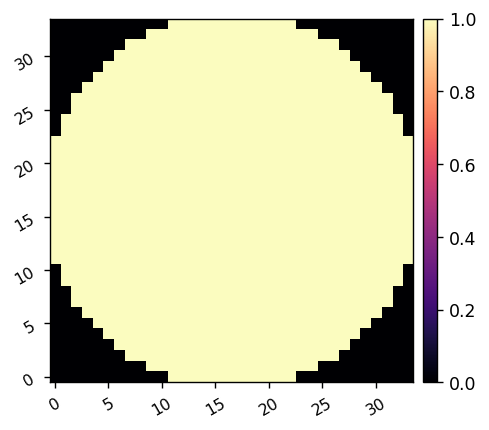

In [49]:
imshow1(np.asarray(DM.dm_mask))

In [67]:
act_inds = list(np.argwhere(np.asarray(DM.dm_mask)))
act_inds

[array([ 0, 11]),
 array([ 0, 12]),
 array([ 0, 13]),
 array([ 0, 14]),
 array([ 0, 15]),
 array([ 0, 16]),
 array([ 0, 17]),
 array([ 0, 18]),
 array([ 0, 19]),
 array([ 0, 20]),
 array([ 0, 21]),
 array([ 0, 22]),
 array([1, 9]),
 array([ 1, 10]),
 array([ 1, 11]),
 array([ 1, 12]),
 array([ 1, 13]),
 array([ 1, 14]),
 array([ 1, 15]),
 array([ 1, 16]),
 array([ 1, 17]),
 array([ 1, 18]),
 array([ 1, 19]),
 array([ 1, 20]),
 array([ 1, 21]),
 array([ 1, 22]),
 array([ 1, 23]),
 array([ 1, 24]),
 array([2, 7]),
 array([2, 8]),
 array([2, 9]),
 array([ 2, 10]),
 array([ 2, 11]),
 array([ 2, 12]),
 array([ 2, 13]),
 array([ 2, 14]),
 array([ 2, 15]),
 array([ 2, 16]),
 array([ 2, 17]),
 array([ 2, 18]),
 array([ 2, 19]),
 array([ 2, 20]),
 array([ 2, 21]),
 array([ 2, 22]),
 array([ 2, 23]),
 array([ 2, 24]),
 array([ 2, 25]),
 array([ 2, 26]),
 array([3, 6]),
 array([3, 7]),
 array([3, 8]),
 array([3, 9]),
 array([ 3, 10]),
 array([ 3, 11]),
 array([ 3, 12]),
 array([ 3, 13]),
 array([

In [72]:
[0,1] in act_inds

True

In [102]:
import scipy

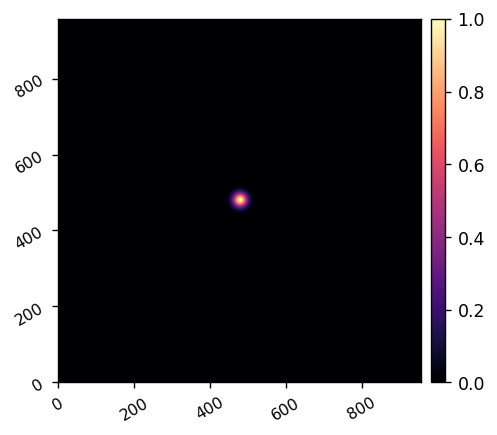

In [131]:
overpad = 100
padded_inf_fun = jdm.pad_or_crop(DM.inf_fun, Nsurf+overpad)
imshow1(np.asarray(padded_inf_fun))

inf_cube = jnp.zeros((DM.Nacts, Nsurf+overpad, Nsurf+overpad))
act_inds = np.argwhere(np.asarray(DM.dm_mask))

count = 0
for i in range(DM.Nacts):
    Nx = int(jnp.round((act_inds[i][1] + 1/2 - DM.Nact/2) * DM.inf_sampling))
    Ny = int(jnp.round((act_inds[i][0] + 1/2 - DM.Nact/2) * DM.inf_sampling))
    shifted_inf_fun = jnp.array(scipy.ndimage.shift(np.asarray(padded_inf_fun), (Ny,Nx)))
#     imshow1(np.asarray(shifted_inf_fun))
    inf_cube = inf_cube.at[i].set(shifted_inf_fun)

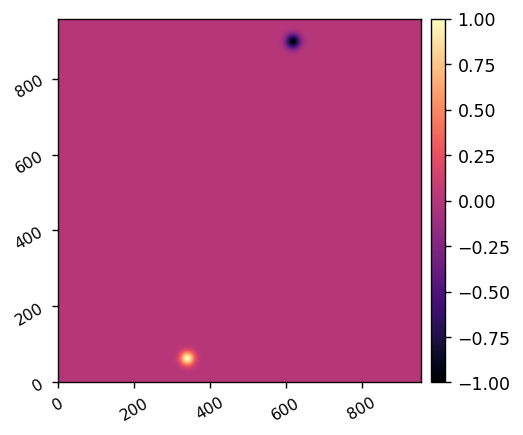

In [132]:
imshow1(np.asarray(inf_cube[0] - inf_cube[-1]))

In [113]:
inf_cube.shape

(952, 958, 958)

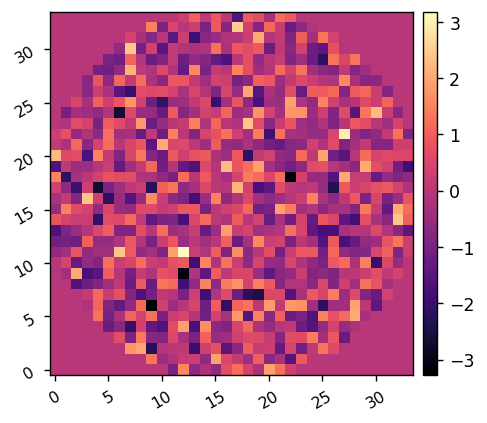

In [133]:

acts = jnp.array(np.random.randn(DM.Nacts))
imshow1(np.asarray(DM.map_actuators_to_command(acts)))

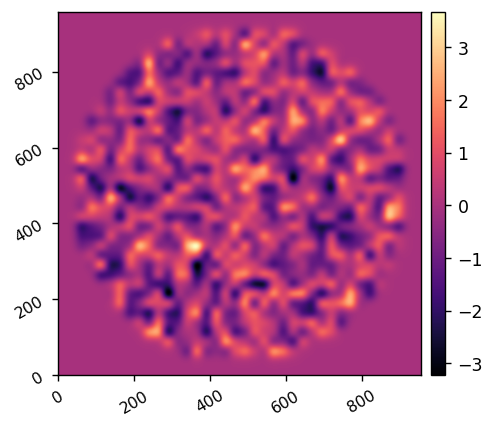

In [137]:
inf_matrix = inf_cube.reshape(DM.Nacts, inf_cube.shape[1]**2,).T
surf = inf_matrix.dot(acts).reshape(inf_cube.shape[1], inf_cube.shape[1])
imshow1(np.asarray(surf))

In [141]:
new_surf

_IndexUpdateRef(Array([[ 9.85036979e-167,  5.97978079e-166,  4.35496042e-166, ...,
         3.43718002e-165,  6.27569435e-166,  1.66989652e-166],
       [ 5.79932988e-166,  4.35496042e-166, -1.74203885e-165, ...,
         2.78137468e-165,  4.47953870e-165,  1.26718755e-165],
       [ 7.65639580e-166, -1.74203885e-165, -9.12624548e-165, ...,
        -3.93224647e-164,  1.23001998e-164,  3.86819630e-165],
       ...,
       [-2.52846284e-165, -6.63213208e-165, -2.22164134e-164, ...,
         2.31723146e-164,  2.33715057e-165,  1.22997242e-164],
       [ 4.65960873e-166, -2.56186504e-165, -6.62378153e-165, ...,
        -2.41911074e-165,  2.26530772e-164,  5.69487166e-165],
       [ 8.70823655e-167,  4.65960873e-166, -2.49867817e-165, ...,
         8.42580392e-165,  5.82078435e-165,  4.54922976e-166]],      dtype=float64), (slice(50, 908, None), slice(50, 908, None)))

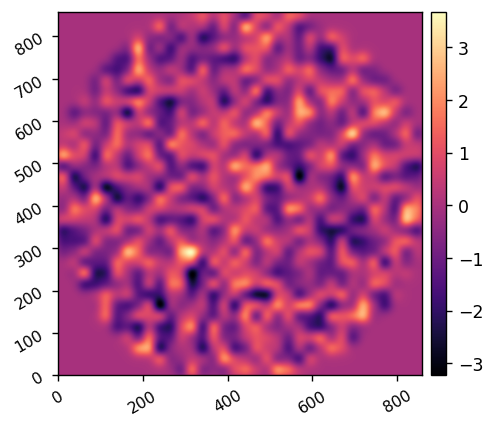

In [142]:
reload(jdm)
new_surf = jdm.pad_or_crop(surf, Nsurf)
imshow1(np.asarray(new_surf))

In [ ]:
jdm

In [85]:
858-429

429

In [ ]:
inf_cube = 